In [29]:
# Download the MNISt dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

C:\Users\sawan\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [30]:
# Load the data
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [31]:
X, y = mnist['data'], mnist['target']

In [32]:
X.shape

(70000, 784)

In [33]:
y.shape

(70000,)

In [34]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

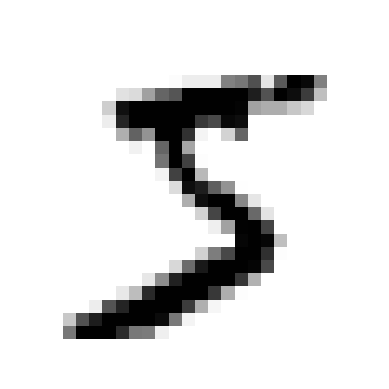

In [35]:
# Show the number 5
some_digit = X[0]
plot_digit(some_digit)
plt.show()

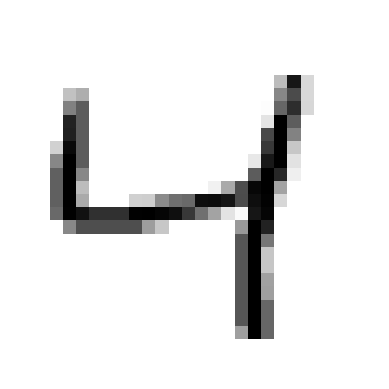

In [47]:
# show the number 9
some_digit = X[2]
plot_digit(some_digit)
plt.show()

In [36]:
y[0]

'5'

In [48]:
y = y.astype(np.uint8)

In [49]:
y[0]

5

In [54]:
# Split the data in the train and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [56]:
# Let's identify the number 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [57]:
# Train the model
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [58]:
# Test the model
sgd_clf.predict([some_digit])

array([False])

In [59]:
# Evaluate the model
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [60]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')
print('Dummy classifier accuracy:', cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy').mean())

Dummy classifier accuracy: 0.90965


In [61]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

In [62]:
# Confusion matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)